In [54]:
import music21 as m21
import numpy as np
import pandas as pd
import os
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns

import pdb

In [446]:
misaligned_files = [
'asap-Fugue_bwv_874-Bian',
'asap-Fugue_bwv_883-Herb',
'asap-Fugue_bwv_883-KaiR',
'asap-Fugue_bwv_883-Khma',
'asap-Fugue_bwv_885-SINK',
'asap-Prelude_bwv_885-SINK'  
]

In [92]:
chroma_metrics = 'eval/chroma'
ctc_chroma_metrics = 'eval/ctc-chroma'
nnls_chroma_metrics = 'eval/nnls'
hpcp_metrics = 'eval/hpcpgram'
cqt_metrics = 'eval/cqt'
dce_metrics = 'eval/dce'

In [432]:
chroma_metrics_df = pd.read_csv(os.path.join(chroma_metrics, 'metric_summary.csv'))
ctc_chroma_metrics_df = pd.read_csv(os.path.join(ctc_chroma_metrics, 'metric_summary.csv'))
nnls_chroma_metrics_df = pd.read_csv(os.path.join(nnls_chroma_metrics, 'metric_summary.csv'))
hpcp_metrics_df = pd.read_csv(os.path.join(hpcp_metrics, 'metric_summary.csv'))
cqt_metrics_df = pd.read_csv(os.path.join(cqt_metrics, 'metric_summary.csv'))
dce_metrics_df = pd.read_csv(os.path.join(dce_metrics, 'metric_summary.csv'))

chroma_metrics_df['algo'] = 'chroma'
ctc_chroma_metrics_df['algo'] = 'ctc_chroma'
nnls_chroma_metrics_df['algo'] = 'nnls'
hpcp_metrics_df['algo'] = 'hpcp'
cqt_metrics_df['algo'] = 'cqt'
dce_metrics_df['algo'] = 'dce'

In [447]:
grouped_df = pd.concat([ctc_chroma_metrics_df, nnls_chroma_metrics_df, hpcp_metrics_df, 
                       chroma_metrics_df, cqt_metrics_df, dce_metrics_df], axis=0, ignore_index=True)
#remove the misaligned files
grouped_df = grouped_df[~grouped_df['file_id'].isin(misaligned_files)]

#cosmetic changes:
grouped_df['average_absolute_offset'] = grouped_df['average_absolute_offset'] * 1000
grouped_df = grouped_df.replace({'algo': {'ctc_chroma': 'CTC-Chroma', 
                         'nnls': 'NNLS', 
                         'hpcp': 'HPCP', 
                         'chroma': 'Chroma',
                          'cqt': 'CQT', 
                          'dce': 'DCE'}})


[Text(0, 0.5, 'Average Absolute Error (AAE) ms'),
 Text(0.5, 0, 'Chroma Extraction Algorithm')]

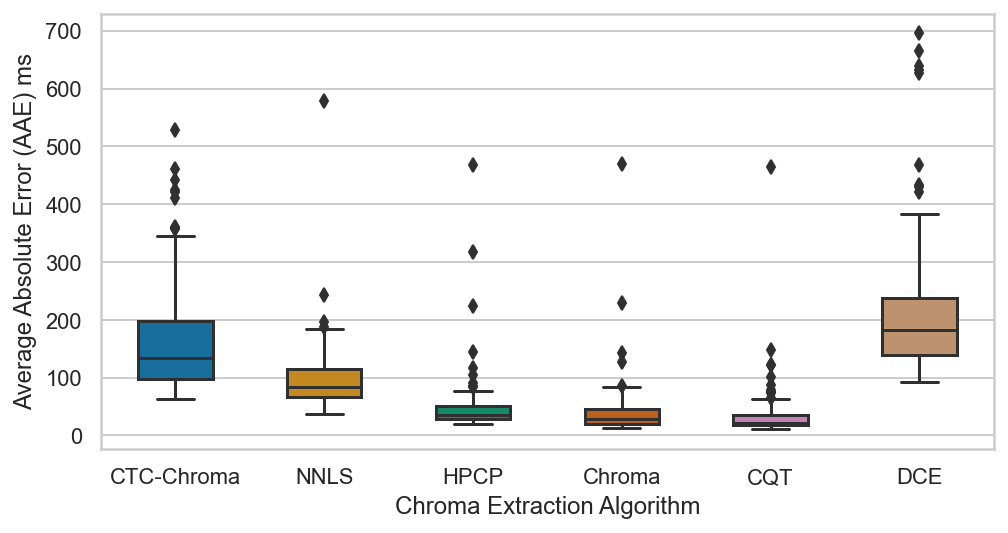

In [437]:
plt.figure(figsize=(8,4))

bplot = sns.boxplot(y='average_absolute_offset', x='algo', 
                 data=grouped_df, 
                 width=0.5,
                 palette="colorblind")
#change the labels for this plot

bplot.set(ylabel= "Average Absolute Error (AAE) ms", xlabel="Chroma Extraction Algorithm")

In [ ]:
## Write function to return files with average misalignment higher than a given thresh.

In [449]:
#to see why the chroma algo, for example, has so many outliers
#dce_metrics_df[dce_metrics_df['average_absolute_offset'] >= 0.25]

algo = 'CTC-Chroma'
grouped_df_algo = grouped_df[grouped_df['algo'] == algo]
grouped_df_algo[grouped_df_algo['average_absolute_offset'] >= 400].sort_values('average_absolute_offset')

file_id  misalignment_rate_50ms  \
0    asap-Fugue_bwv_846-Shi0    87.155963                
47   asap-Fugue_bwv_875-CaoJ    82.587065                
130  asap-Prelude_bwv_883-GuoE  90.551181                
115  asap-Prelude_bwv_867-Sham  90.421456                
114  asap-Prelude_bwv_867-HuNY  92.720307                

     misalignment_rate_250ms  misalignment_mean_50ms  misalignment_mean_250ms  \
0    50.589777                0.467061                0.708713                  
47   38.308458                0.505571                0.935014                  
130  58.942632                0.466084                0.637809                  
115  61.047254                0.484599                0.657400                  
114  63.473819                0.568521                0.768896                  

     variance_misaligned_50ms  variance_misaligned_250ms  1stquartile  \
0    0.476358                  0.805655                   0.098311      
47   0.839331                  1.614042                   0.073783      
130  0.363537                  0.545385                   0.145205      
115  0.326389                  0.432463                   0.118616      
114  0.643756                  0.888968                   0.149498      

       median  3rdquartile  average_absolute_offset        algo  
0    0.251201  0.504941     410.012538               CTC-Chroma  
47   0.179325  0.382031     421.407064               CTC-Chroma  
130  0.321938  0.581600     424.350448               CTC-Chroma  
115  0.346759  0.623743     441.120202               CTC-Chroma  
114  0.368689  0.639209     529.013998               CTC-Chroma

In [391]:
dce_above_0_37 = grouped_df[grouped_df['average_absolute_offset'] >= 0.37]['file_id'].unique()

In [200]:
ctc_chroma_above_0_34 = grouped_df[grouped_df['average_absolute_offset'] >= 0.34]['file_id'].unique()

In [206]:
nnls_above_0_18 = grouped_df[grouped_df['average_absolute_offset'] >= 0.18]['file_id'].unique()

In [207]:
nnls_above_0_18

array(['asap-Fugue_bwv_865-Teo0', 'asap-Fugue_bwv_865-Zhan',
       'asap-Fugue_bwv_883-GuoE', 'asap-Fugue_bwv_887-LiYZ',
       'asap-Prelude_bwv_873-Lisi'], dtype=object)

In [201]:
ctc_chroma_above_0_34

array(['asap-Fugue_bwv_846-Shi0', 'asap-Fugue_bwv_858-VuV0',
       'asap-Fugue_bwv_875-CaoJ', 'asap-Prelude_bwv_857-Lan0',
       'asap-Prelude_bwv_857-Wang', 'asap-Prelude_bwv_867-HuNY',
       'asap-Prelude_bwv_867-Sham', 'asap-Prelude_bwv_883-GuoE',
       'asap-Prelude_bwv_883-LuM0'], dtype=object)

In [203]:
dce_above_0_37

array(['asap-Fugue_bwv_858-VuV0', 'asap-Fugue_bwv_875-Ahfa',
       'asap-Fugue_bwv_875-CaoJ', 'asap-Prelude_bwv_846-Shi0',
       'asap-Prelude_bwv_857-Wang', 'asap-Prelude_bwv_867-HuNY',
       'asap-Prelude_bwv_867-Sham', 'asap-Prelude_bwv_883-GuoE',
       'asap-Prelude_bwv_883-LuM0'], dtype=object)

In [40]:
sns.set_theme(style="whitegrid")

In [67]:
#here just change to the one we would like to evaluate right now
algo_name = 'chroma'
algo_results_df = chroma_metrics_df.fillna(0)


In [68]:
start_rate_50 = algo_results_df['misalignment_rate_50ms'].values.min()
end_rate_50 = algo_results_df['misalignment_rate_50ms'].values.max()

misalignment_rate_50_range = widgets.FloatRangeSlider(min = start_rate_50,
                                                 max = end_rate_50,
                                                 value = [start_rate_50 , end_rate_50], 
                                                 step=0.01, 
                                       description = "rate 50")

start_rate_250 = algo_results_df['misalignment_rate_250ms'].values.min()
end_rate_250 = algo_results_df['misalignment_rate_250ms'].values.max()

misalignment_rate_250_range = widgets.FloatRangeSlider(min = start_rate_250,
                                                  max = end_rate_250, 
                                                  value = [start_rate_250, end_rate_250], 
                                                  step=0.01,
                                        description = "rate 250")

start_mean_250 = algo_results_df['misalignment_mean_250ms'].values.min()
end_mean_250 = algo_results_df['misalignment_mean_250ms'].values.max()

misalignment_mean_250_range = widgets.FloatRangeSlider(min = start_mean_250, 
                                                  max = end_mean_250, 
                                                  value = [start_mean_250, end_mean_250],
                                                  step=0.01, 
                                        description = "mean 250")

In [69]:
#attach appropriate event handlers to the widgets (if needed) before passing them into interact

@widgets.interact_manual(misalignment_rate_50_range = misalignment_rate_50_range, 
                         misalignment_rate_250_range = misalignment_rate_250_range,
                         misalignment_mean_250_range = misalignment_mean_250_range)
    
def filter_results(misalignment_rate_50_range, misalignment_rate_250_range, misalignment_mean_250_range):
    
    filtered_df = algo_results_df[algo_results_df['misalignment_mean_250ms'] >= misalignment_mean_250_range[0]] 
    filtered_df = filtered_df[filtered_df['misalignment_mean_250ms'] <= misalignment_mean_250_range[1]]
                                  
    filtered_df = filtered_df[filtered_df['misalignment_rate_250ms'] >= misalignment_rate_250_range[0]]
    filtered_df = filtered_df[filtered_df['misalignment_rate_250ms'] <= misalignment_rate_250_range[1]]

    filtered_df = filtered_df[filtered_df['misalignment_rate_50ms'] >= misalignment_rate_50_range[0]]
    filtered_df = filtered_df[filtered_df['misalignment_rate_50ms'] <= misalignment_rate_50_range[1]]
    
    
    display(filtered_df)
    
    #algo_results_df[algo_results_df['misalignment_mean_
    
    #display(misalignment_mean_250_range)
    #display(misalignment_rate_250_range)
    #display(misalignment_rate_50_range)
    
    #show the filtered portion of the dataframe
    
    return

interactive(children=(FloatRangeSlider(value=(1.5918958031837915, 100.0), description='rate 50', min=1.5918958…

In [ ]:
#make a dropdown based on the resultant df

filtered_df.

In [ ]:
#Dropdowns --> to be based on a slider. 

#better add a metadata calculator for songs with the characteristics above
# avg time offset between midi score and performance midi.  (just calculate this as the slope)
# variance of the time rate. interpolate, and see if the interpolated function is linearly moving
# (we already have the high misalignment rate calculated)
# for the tempo: time/midi events [not so accurate because chords would increase the number of notes regardless
# the notes per a unit time better be grouped and we treat them as just one. 

## Display Alignment Rate per threshold

In [96]:
chroma_threshold_df = pd.read_csv(os.path.join(chroma_metrics, 'threshold_summary.csv'))
ctc_threshold_df = pd.read_csv(os.path.join(ctc_chroma_metrics, 'threshold_summary.csv'))
nnls_threshold_df = pd.read_csv(os.path.join(nnls_chroma_metrics, 'threshold_summary.csv'))
hpcp_threshold_df = pd.read_csv(os.path.join(hpcp_metrics, 'threshold_summary.csv'))
cqt_threshold_df = pd.read_csv(os.path.join(cqt_metrics, 'threshold_summary.csv'))
dce_threshold_df = pd.read_csv(os.path.join(dce_metrics, 'threshold_summary.csv'))

In [220]:
grouped_threshold_df = pd.concat([ctc_threshold_df, nnls_threshold_df, hpcp_threshold_df, 
                       chroma_threshold_df, cqt_threshold_df, dce_threshold_df], axis=0, ignore_index=True)

grouped_threshold_df = grouped_threshold_df.replace({'algo': {'ctc-chroma': 'CTC-Chroma', 
                         'nnls': 'NNLS', 
                         'hpcp': 'HPCP', 
                         'chroma': 'Chroma',
                          'cqt': 'CQT', 
                          'dce': 'DCE'}})

[Text(0, 0.5, 'Overall Alignment Rate (OAR)'),
 Text(0.5, 0, 'Error Threshold (ms)')]

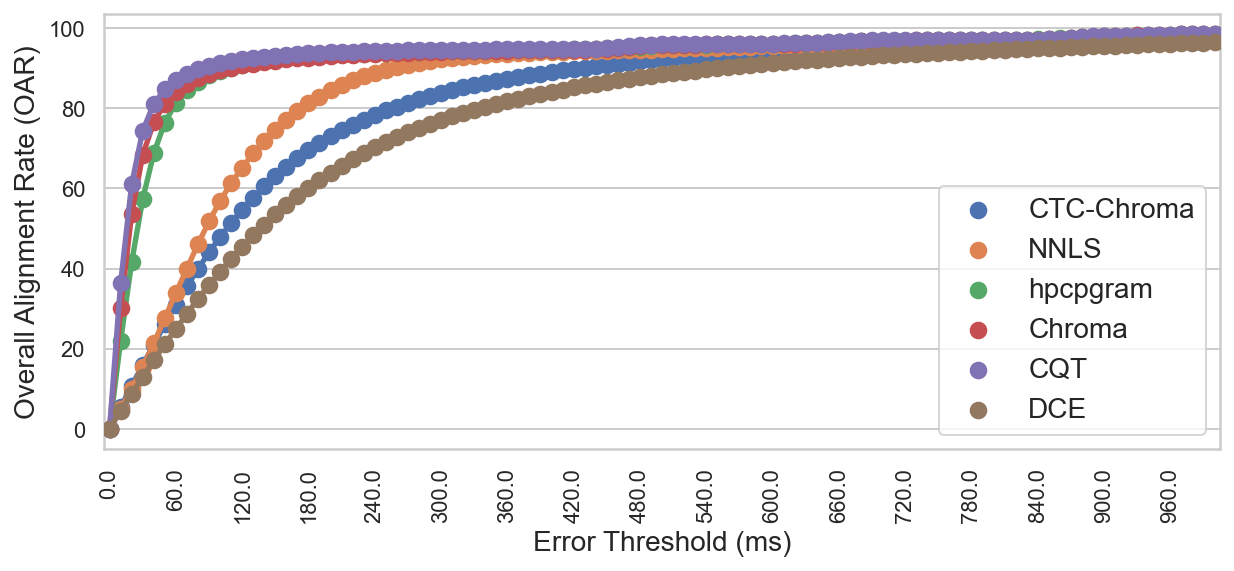

In [382]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MaxNLocator, FormatStrFormatter,
                               AutoMinorLocator)
plt.figure(figsize=(10,4))
plt.xticks(rotation = 90)
g = sns.pointplot(x="threshold", y="alignment_rate", hue="algo", data=grouped_threshold_df, scatter=False, legend=True)
g.legend_.set_title(None)
g.legend(loc=0, prop={'size': 14})
g.set_xlabel("X-Axis", fontsize = 14)
g.set_ylabel("Y-Axis", fontsize = 14)

g.xaxis.set_major_locator(MaxNLocator(19))
#g.xaxis.label.set_size(10)
#g.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# For the minor ticks, use no labels; default NullFormatter.
#ax.xaxis.set_minor_locator(MultipleLocator(5))
g.set(ylabel= "Overall Alignment Rate (OAR)", xlabel="Error Threshold (ms)")


### At the misalignment threshold where they mostly plateau, which files (per algo) have horrible alignment rates nevertheless?

In [ ]:
#put a slider to select the misalignment threshold
#choose algo with a drop down
#and we should have a filtered dropdown that we can explore as we'd like.


In [139]:
chroma_local_threshold_df = pd.read_csv(os.path.join(chroma_metrics, 'local_thresholds.csv'))
ctc_local_threshold_df = pd.read_csv(os.path.join(ctc_chroma_metrics, 'local_thresholds.csv'))
nnls_local_threshold_df = pd.read_csv(os.path.join(nnls_chroma_metrics, 'local_thresholds.csv'))
hpcp_local_threshold_df = pd.read_csv(os.path.join(hpcp_metrics, 'local_thresholds.csv'))
cqt_local_threshold_df = pd.read_csv(os.path.join(cqt_metrics, 'local_thresholds.csv'))
dce_local_threshold_df = pd.read_csv(os.path.join(dce_metrics, 'local_thresholds.csv'))

grouped_local_threshold_df = pd.concat([ctc_local_threshold_df, nnls_local_threshold_df, hpcp_local_threshold_df, 
                       chroma_local_threshold_df, cqt_local_threshold_df, dce_local_threshold_df], axis=0, ignore_index=True)

In [153]:
start_threshold = grouped_threshold_df['threshold'].values.min()
end_threshold = grouped_threshold_df['threshold'].values.max()

misalignment_threshold_picker = widgets.IntSlider(min = start_threshold,
                                                 max = end_threshold,
                                                 step=30, 
                                                 value=500,
                                       description = "Misalignment Threshold")

algo_options = grouped_local_threshold_df['algo'].unique()
algo_picker = widgets.Dropdown(options= np.append(grouped_local_threshold_df['algo'].unique(), 'all'),
    value='all',
    description='Reps',
    disabled=False,
)

filtering_results = []
misalignment_rate_cutoff = 0.80 

In [152]:
@widgets.interact_manual(misalignment_threshold = misalignment_threshold_picker, algo = algo_picker)
def filter_alignment(misalignment_threshold, algo):
    filtered_df = grouped_local_threshold_df
    if algo != 'all':
        filtered_df = filtered_df[filtered_df['algo'] == algo]
    
    filtered_df = filtered_df[filtered_df['threshold'] >= misalignment_threshold]
    filtered_df = filtered_df[filtered_df['alignment_rate'] <= (1-misalignment_rate_cutoff)]
    
    #get the unique files, and the algos in which their ar is larger than the thresh
    files = filtered_df['file'].unique()
    
    unique_files_df = pd.DataFrame(data=[], columns=['file', 'algos'])
    for file in files:
        temp_df = filtered_df[filtered_df['file'] == file]
        series_df = pd.Series([file, temp_df['algo'].unique()], index=unique_files_df.columns)
        unique_files_df = unique_files_df.append(series_df, ignore_index=True)
        
    return unique_files_df
    
    

interactive(children=(IntSlider(value=500, description='Misalignment Threshold', max=1000, step=30), Dropdown(…

Interpretation:
At time threshold x, those are the files which have low alignment rates.
The higher the time threshold, the higher the alignment rate for most files, since more files will have good or near perfect alignment rates.
So, as we raise the time threshold, we should expect to see less files.


Further Evaluation:
Worst result portions?


We can say we did 2 iterations to detect and remove files for which the alignments were not correct.

1. Using the box and whisker plot, remove the common outliers between the different techniques. The figure present in the paper has some of these outliers already removed. Using the Bach Preludes and Fugues, there were about 5 files present as outliers with a high score, we listened to them, and we removed them.

2. But then, apart from such obvious files, we did not want to be cherry picking the files that only perform well. So we decided to plot the the overall alignment rate for a each representation, over the entire data, for a sweep of time thresholds. 

3. 

Potential Titles:

Maybe the narrative can be Exploring Challenges in the application of DTW Audio to Score Alignment Systems

And as such, we can say that this paper is not about proposing all solutions, we decided to employ 5 of the easily accessible audio representations that could be applied for audio to score alignment. (without needing to defend why those would be such a great idea). 


Does it make sense to generate the colored scores based on absolute threshold values, or should it be relative to the error margins of a given alignment approach?

For this, it would depend on the goal of such visualizations: if the idea is to look at the result of an alignment and to know whether it is ok or not, it should be based on the thresholds we are willing to accept as a success.

But, if our goal is to find out which parts of a given score do not get aligned well with the aim of finding patterns that can be aligned well and others that don't, then making the coloring relative makes more sense. 

### Bar chart on the difference between beats

In [370]:
from matplotlib.ticker import MultipleLocator

def create_beat_histogram(perfdir):
    perf_beat_annotations = sorted([f for f in os.listdir(perfdir) if f.endswith('.txt')])

    total_beat_windows = []
    beat_windows_df = pd.DataFrame(columns = ['score', 'beat_window', 'beat_index', 'bpm_approx'])
    
    for perf_beat_annotation in perf_beat_annotations:
        perf_beat_annot_df = pd.read_csv(os.path.join(perfdir, perf_beat_annotation), delimiter='\t', header=None)
        #calculate time difference between consecutive beats
        beat_windows = [first - second for first, second in zip(perf_beat_annot_df[0][1:], perf_beat_annot_df[0][0:-1])]
        total_beat_windows.extend(beat_windows)
        
        #calculate some heuristic for the bpm
        #num beats, #time in mins
        bpm_approx = len(perf_beat_annot_df) / (perf_beat_annot_df[0].values[-1] / 60)
        
        to_append = np.stack([[perf_beat_annotation]*len(beat_windows), beat_windows, 
                              np.arange(0, len(beat_windows)), [bpm_approx] * len(beat_windows)], axis=1)
        new_row_df = pd.DataFrame(columns = beat_windows_df.columns, data=to_append)

        beat_windows_df = beat_windows_df.append(new_row_df, ignore_index=True)
        
    total_beat_windows = np.array(total_beat_windows)
    
    fig, ax = plt.subplots()
    ax.hist(total_beat_windows*1000, bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 4000] )
    
    csfont = {'fontname':'Helvetica', 'fontsize': 14, 'fontweight': 'bold'}
    hfont = {'fontname':'Helvetica', 'fontsize': 14}
    
    #plt.title('Distribution of Intra-beat Time Windows', **csfont)
    plt.xlabel('Time Window Between Beats (ms)', **hfont)
    plt.ylabel('Frequency', **hfont)
    
    ax.xaxis.set_minor_locator(MultipleLocator(100))
    #ax.set_xticks(, minor=True)
    ax.minorticks_on = True
    plt.grid(which='major')
    plt.show()

    return beat_windows_df
    

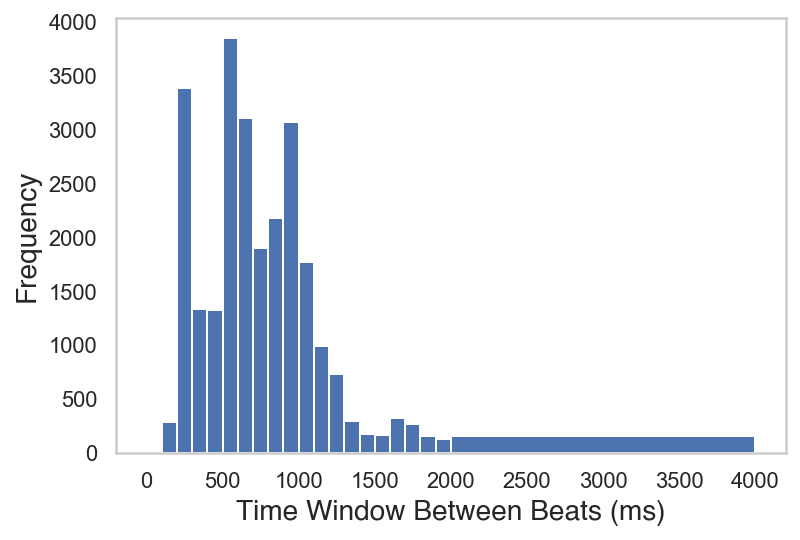

In [371]:
total_beat_windows_df = create_beat_histogram('data/perf')

In [360]:
total_beat_windows_df = total_beat_windows_df.sort_values('beat_windows')

In [367]:
total_beat_windows_df.to_csv('beat_windows.csv')

In [363]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [ ]:
# Where is it the case that the beats are so far from one another?

In [ ]:
# What is the bpm of these milliseconds? Is this normal? It doesn't make sense that some beat annotations are as sparse.

#check out the bpm of a piece from the ASAP annotations. 



Text(0, 0.5, 'Beat Time in Performance (s)')

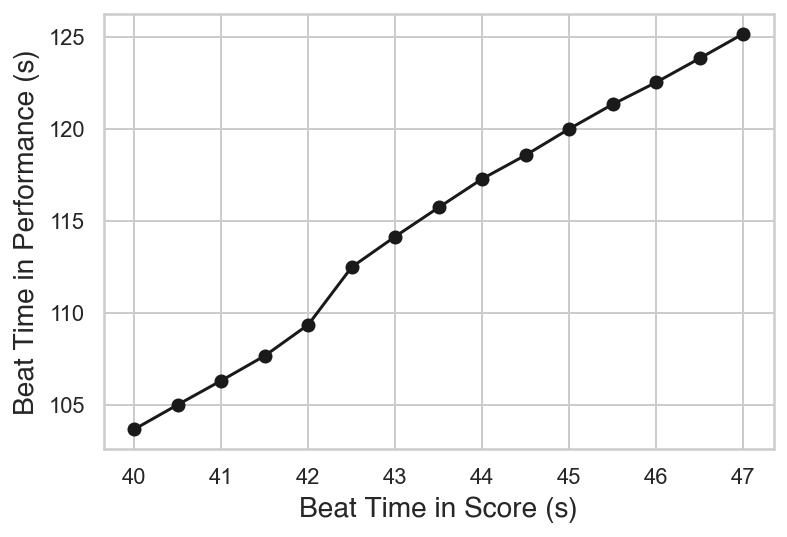

In [419]:
path = '/Users/aliamorsi/Desktop/phD/a2s_with_dtw_survey/pitchclass_mctc/data/asap-preludes/Bach/Prelude/bwv_883/'

score_beat_annotation = os.path.join(path, 'midi_score_annotations.txt')
perf_beat_annotation = os.path.join(path, 'GuoE01M_annotations.txt')

score_beat_annot_df =  pd.read_csv(score_beat_annotation, delimiter='\t', header=None)
perf_beat_annot_df =  pd.read_csv(perf_beat_annotation, delimiter='\t', header=None)

start_i = 80
end_i = 95
#1. load a beat annotation
plt.plot(score_beat_annot_df[0][start_i:end_i], perf_beat_annot_df[0][start_i:end_i], marker='o', c='k')
#plt.plot(score_beat_annot_df[0][start_i:end_i], perf_beat_annot_df[0][start_i:end_i], 'kx')
#. plot only a subset of it?

csfont = {'fontname':'Helvetica', 'fontsize': 14, 'fontweight': 'bold'}
hfont = {'fontname':'Helvetica', 'fontsize': 14}
    
#plt.title('Linearized Alignment', **csfont)
plt.xlabel('Beat Time in Score (s)', **hfont)
plt.ylabel('Beat Time in Performance (s)', **hfont)


In [413]:
score_midi = 'asap-Prelude_bwv_857-Lan0.midi'
base_scores = 'data/score'
import pretty_midi
import IPython.display as ipd

In [417]:
midi_score_fluidsynth = pretty_midi.PrettyMIDI(os.path.join(base_scores, score_midi)).fluidsynth(fs=44100)

In [418]:
ipd.Audio(midi_score_fluidsynth, rate=44100)

In [ ]:
import music21 as m21

#load midi score
midi_score_music21 = m21.converter.parse(os.path.join(base_scores, score_midi))

#load musicxml score
#musicxml_score_music21 = 

In [ ]:
midi_pair_fluidsynth_m21 = 



In [ ]:
midi_xml_pair_m21 = 